In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [ ]:
# Read School Data File and store into Pandas Data Frames
school_data_df = pd.read_csv("../Final Output Data/schoolRank_data.csv")
school_data_df

In [ ]:
#checking the data type for each column
school_data_df.dtypes

In [ ]:
#checking the number of records
school_data_df.count()

### Number of Records
    '2019 Rank, Rank Stars, Rank Level, and Avg Score' have 100 data points less than the other column values, 
whereas '2019 student count' is missing most of the values

In [ ]:
#Discarding rows with no Rank value for 2019
school_data_df =school_data_df[~school_data_df['2019 Rank'].isnull()]
school_data_df

In [ ]:
#checking the count after removing rows with null values
school_data_df.count()

In [ ]:
#Extracting data for school year 2019
school_data_2019=school_data_df.drop(columns=['2018 Rank',  '2018 Rank Level', '2018 Avg Score',
                                              'School Name', 'Address','Low Grade','High Grade', '2019 Student Count',
                                             '2018 Rank Stars'])
school_data_2019


In [ ]:
#exporting 2019 data to csv
school_data_2019.to_csv("../Final Output Data/school_data_2019.csv")

In [ ]:
#top 10 performing schools of 2019
school_data_2019_sorted=school_data_2019.sort_values('2019 Rank')
school_data_2019_sorted.head(10)

In [ ]:
#Bottom 10 schools
school_data_2019_bottom=school_data_2019.sort_values('2019 Rank', ascending=False)
school_data_2019_bottom.head(10)

In [ ]:
#Average rank of the school by the zip code
avg_rank_zip=school_data_2019.groupby(['Zip Code']).mean()[['2019 Rank','2019 Avg Score']]
avg_rank_zip

In [ ]:
avg_rank_zip.to_csv("../Final Output Data/avg_rank_zip_2019.csv")

In [ ]:
avg_rank_city=school_data_2019.groupby(['City']).mean()[['2019 Rank', '2019 Avg Score']]
avg_rank_city

In [ ]:
avg_rank_city.to_csv("../Final Output Data/avg_rank_city_2019.csv")

In [41]:
#Create a pie-chart
rank_sizes = school_data_2019.groupby(['2019 Rank Stars']).count()
rank_sizes


,Unnamed: 0,School ID,City,Zip Code,2019 Rank,2019 Rank Level,2019 Avg Score,School Level
2019 Rank Stars,,,,,,,,
0.0,162,162,162,162,162,162,162,162
1.0,450,450,450,450,450,450,450,450
2.0,400,400,400,400,400,400,400,400
3.0,550,550,550,550,550,550,550,550
4.0,550,550,550,550,550,550,550,550
5.0,300,300,300,300,300,300,300,300


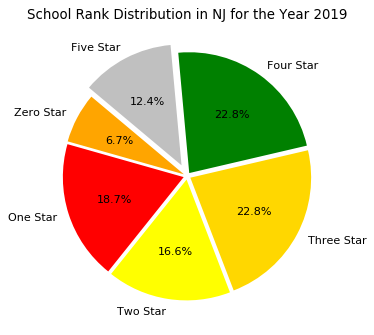

In [52]:
sizes=rank_sizes['2019 Rank'] 
colors = ['Orange','Red','yellow',"gold","Green","Silver"]
labels=['Zero Star','One Star','Two Star', 'Three Star','Four Star','Five Star']
explode = (0.03,0.03,0.03,0.03,0.03,0.1)
plt.figure(figsize=(5,5), dpi=80)
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%', explode=explode, startangle =140 )
plt.title("School Rank Distribution in NJ for the Year 2019")
plt.show()